**Стохастический градиентный спуск (SGD)** -  итерационный метод для оптимизации целевой функции с подходящими свойствами гладкости.
Линейная регрессия - задача оптимизации или минимизации квадратичной ошибки. Ошибка в данном случае - (фактическое значение - прогнозируемое начение)

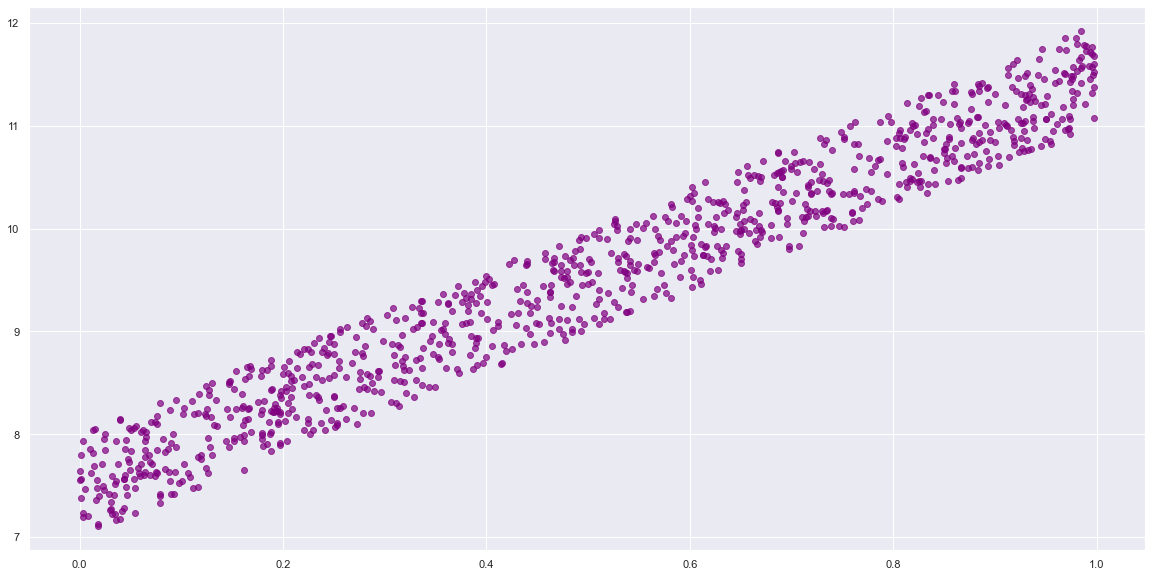

In [69]:
# Генерация случайного рассеяния
import numpy as np
x = np.random.rand(1000, 1)
noise = np.random.rand(1000,1)
w, b = 4, 7
y = w * x + b + noise

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)
plt.scatter(x, y, c='purple', alpha=0.7)
plt.show()

In [70]:
ones = np.ones((1000, 1))
x_b = np.c_[ones, x]

In [71]:
def eta_new(t):
    return 6/(2 + t) +0.01

Стохастический градиентный спуск:

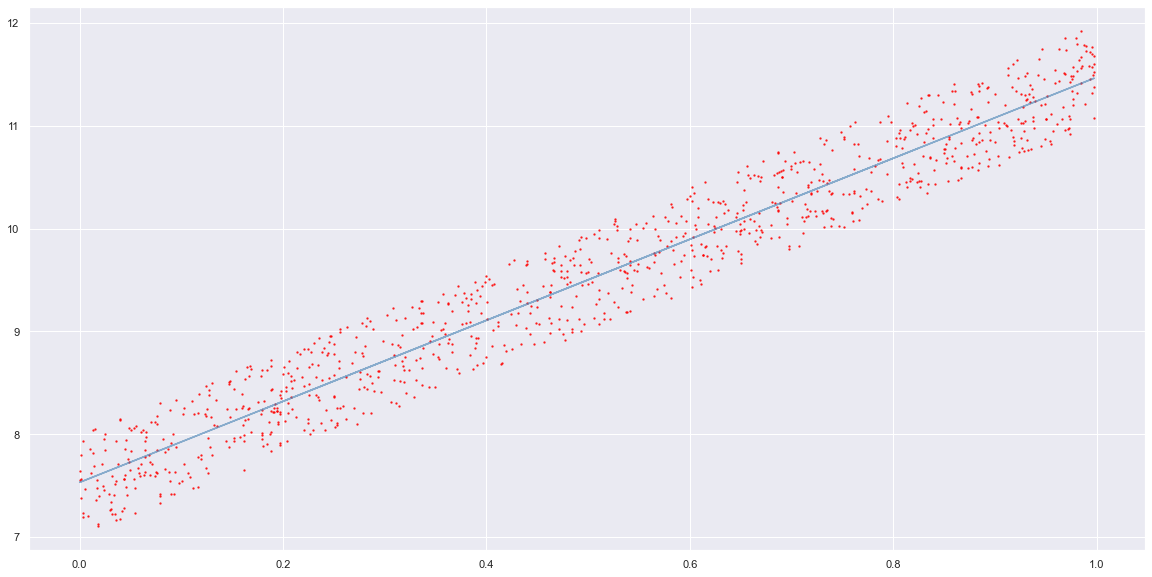

In [72]:
n = 1000  # кол-во итераций
w = np.random.randn(2,1)

# Cтохастическbq градиентнsq спуск
for time in range(n):
    for index in range(1,len(x)):
        r_index = np.random.randint(index)
        xi = x_b[r_index : r_index+1]
        yi = y[r_index : r_index+1] 
        eta = eta_new(time + index)
        td = xi.T.dot(xi.dot(w) - yi)
        w -= eta * td

plt.scatter(x, y, s=2, c='red',alpha=0.7) # Исходные данные
plt.plot(x, x_b.dot(w), c = 'steelblue', alpha =0.6) # Подогнанные данные после итерации
plt.show()

In [23]:
import pandas as pd

data = pd.read_csv('./winequality-red.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Text(0, 0.5, 'density')

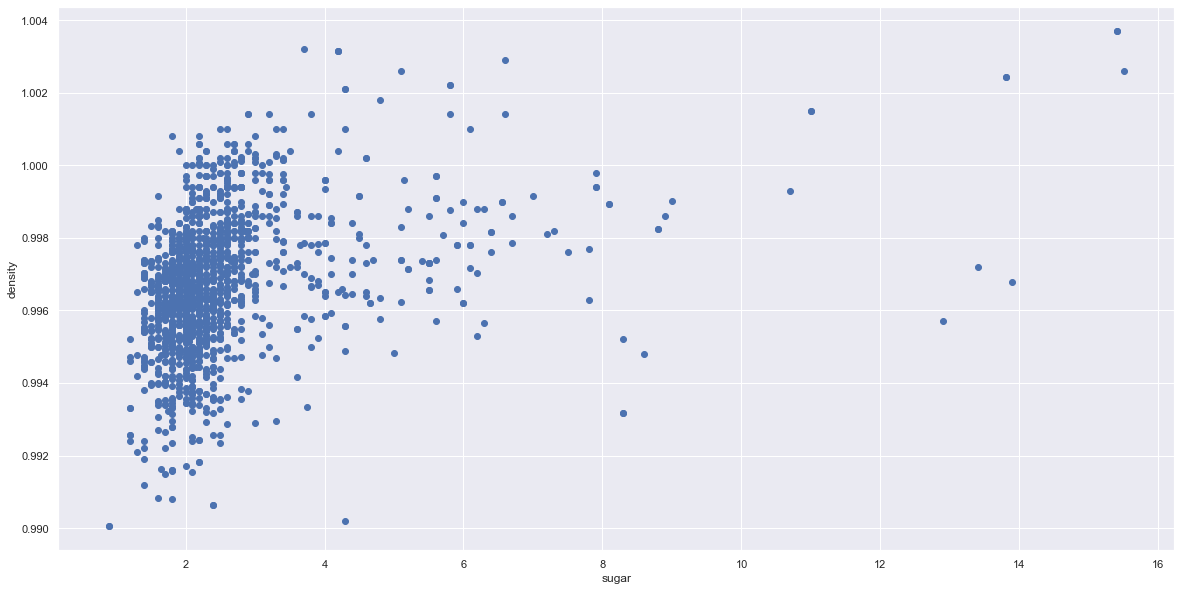

In [73]:
sugar = data["residual sugar"]
density = data["density"]
plt.scatter(sugar,density)
plt.xlabel("sugar")
plt.ylabel("density")

In [132]:
m = 10
def predict(m, input_sugar):
    return m*input_sugar

# MSE
def evaluate(m):
    density_predicted = predict(m, sugar)
    MSE = ((density - density_predicted)**2).mean()
    return MSE

print(evaluate(m))

793.5824224741032


In [133]:
# SGD

def learn(m):
    random = np.random.randint(0, len(sugar) - 1)
    derivative = 2*(m*sugar[random] - density[random])*m
    m = m - 0.005*derivative  
    
    return m

In [160]:
print ("Initial value of M: ", m)
for i in range(0, 5000):
    m = learn(m)
    if i %100 == 0:
        # Y_pred = m*sugar
        print ("Loss: ", evaluate(m), "(M =", m, ")")

Initial value of M:  0.3782552903535126
Loss:  0.2860692350050015 (M = 0.3791683586023419 )
Loss:  0.3371310509463635 (M = 0.4110724781134676 )
Loss:  0.3409422442165879 (M = 0.41309268780983555 )
Loss:  0.312060622439563 (M = 0.39673507391929663 )
Loss:  0.36052961207965917 (M = 0.4229519199627431 )
Loss:  0.33723338011809717 (M = 0.4111272007619564 )
Loss:  0.327036085183286 (M = 0.40553431349367874 )
Loss:  0.2914072456527221 (M = 0.3830805818326307 )
Loss:  0.33680050391400057 (M = 0.41089552636812987 )
Loss:  0.28623683882901113 (M = 0.3792941385460049 )
Loss:  0.2888501369531608 (M = 0.38123005701893575 )
Loss:  0.3284931849507823 (M = 0.40635153520269574 )
Loss:  0.2692605032312137 (M = 0.3653315155800988 )
Loss:  0.29420909763872827 (M = 0.385061893876334 )
Loss:  0.32972738239432636 (M = 0.4070388505649727 )
Loss:  0.30809008082517036 (M = 0.39426409767283765 )
Loss:  0.29471408521996695 (M = 0.38541409212417027 )
Loss:  0.3018399675564019 (M = 0.39023717063285296 )
Loss:  0.2

<AxesSubplot:xlabel='residual sugar', ylabel='density'>

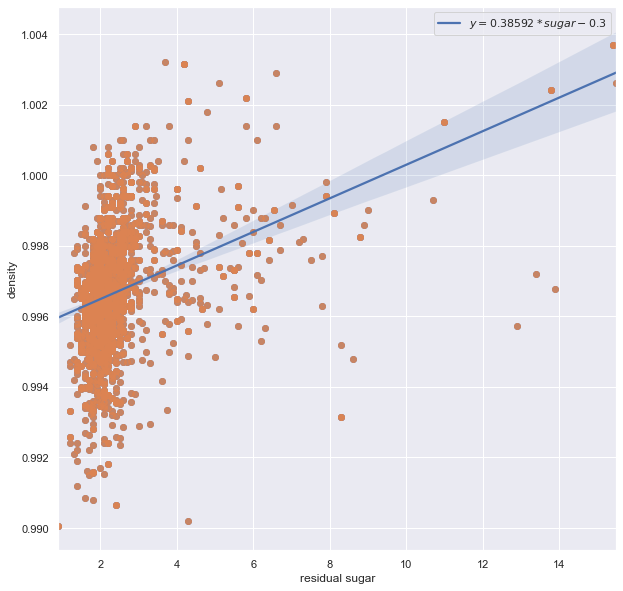

In [178]:
intercept = 0.3
fig, ax = plt.subplots()
ax = sns.regplot(x=sugar, y=density, line_kws={'label':'$y=%3.7s*sugar-%3.7s$'%(m, intercept)});
ax.legend()
sns.regplot(x=sugar, y=density, fit_reg=False, ax=ax)